In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [3]:
df = pd.read_csv('Advertising.csv')
df.head(6)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2


In [4]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
pd.DataFrame(df.isnull().sum(), columns =["Count of Null Values"]).T

,TV,Radio,Newspaper,Sales
Count of Null Values,0,0,0,0


In [6]:
X = df[['TV']]

In [7]:
Y = df['Sales']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=50)

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train.values, Y_train)

LinearRegression()

In [10]:
b0 = round(model.intercept_,2)
b1 = round(model.coef_[0],2)

print('Intercept (b0):', b0)
print('Coefficient (b1):', b1)

Intercept (b0): 6.89
Coefficient (b1): 0.06


In [11]:
Tv_advertisment = [[120]]

pred = model.predict(Tv_advertisment)
print("prediction= ", pred[0])

prediction=  13.695422045001305


In [12]:
Tv_advertisment

[[120]]

In [13]:
b0 = model.intercept_
b1 = model.coef_[0]
a = Tv_advertisment[0][0]
pred2 = b0 + b1 * a
print("prediction = ", pred2)

prediction =  13.695422045001305


In [14]:
Y_pred = model.predict(X_test.values)

In [15]:
Y_pred

array([16.85430492, 20.18899637,  8.23968537, 14.22851898, 12.34566599,
       19.27592609, 20.05288651,  7.37765629, 19.82036551, 11.89763771,
       20.48957229, 16.9280311 , 19.18518619, 16.67282512, 21.79962965,
       14.55745113, 13.75213448, 19.83737924,  9.32856421, 14.35895759,
       13.11695516, 11.160376  , 10.42311429, 19.50277585, 22.41212399,
       10.76906017, 12.01673384, 12.31730977, 17.37605937, 18.61806179,
       13.87123061, 15.38545274,  7.84836953, 18.09630735, 11.22275968,
        9.42497535, 12.71429684, 21.78828716, 11.83525403, 11.22275968])

In [16]:
diff = pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred})
diff.head(10)

,Actual,Predicted
112,17.1,16.854305
165,16.9,20.188996
12,9.2,8.239685
73,11.0,14.228519
144,12.3,12.345666
20,18.0,19.275926
199,18.4,20.052887
8,4.8,7.377656
39,21.5,19.820366
88,12.9,11.897638


In [18]:
from sklearn import metrics
import numpy as np

mae = metrics.mean_absolute_error(Y_test,Y_pred)
mse = metrics.mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))

In [19]:
print('mae =',mae.round(2))
print('mse =',mse.round(2))
print('rmse =',rmse.round(2))

mae = 1.74
mse = 4.66
rmse = 2.16


<AxesSubplot: xlabel='Sales'>

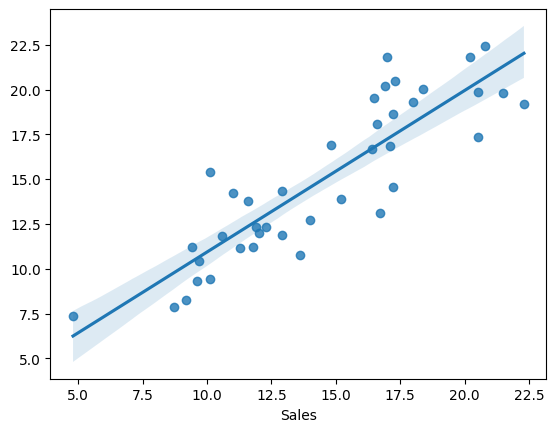

In [20]:
sns.regplot(x = Y_test, y = Y_pred)